In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing

In [2]:
data=pd.read_csv('dataset1.csv')
data

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,102,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
90,103,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1058,-80.603956,28.608058
91,104,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
92,105,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


In [3]:
#data preprocessing
#delete falcon1
data=data.drop(data[data['BoosterVersion']=='Falcon 1'].index)
data

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,102,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
90,103,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1058,-80.603956,28.608058
91,104,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
92,105,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


In [4]:
#数据描述
data.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude
count,90.000000,85.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,56.477778,6123.547647,1.788889,3.500000,3.144444,-86.366477,29.449963
std,29.232977,4870.916417,1.213172,1.595288,4.106890,14.149518,2.141306
min,6.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857
25%,32.250000,2482.000000,1.000000,2.000000,0.000000,-80.603956,28.561857
50%,55.500000,4535.000000,1.000000,4.000000,1.000000,-80.577366,28.561857
75%,82.750000,9600.000000,2.000000,5.000000,4.000000,-80.577366,28.608058
max,106.000000,15600.000000,6.000000,5.000000,12.000000,-80.577366,34.632093


In [5]:
#3sigma outliers detection

def detect_outliers(data,threshold=3):
    mean_d = np.mean(data)
    std_d = np.std(data)
    outliers = []
    
    for y in data:
        z_score= (y - mean_d)/std_d 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [6]:
a1=data['PayloadMass']
a2=data['Flights']
a3=data['Block']
a4=data['ReusedCount']
print(detect_outliers(a1),
      detect_outliers(a2),
      detect_outliers(a3),
      detect_outliers(a4))
#flights 异常值6,观察数据暂且保留

[] [6, 6] [] []


In [7]:
#missing value
data.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [8]:
#imputation
data['PayloadMass']=data['PayloadMass'].fillna(data['PayloadMass'].mean())#数值型

In [9]:
#one hot

#先拆分字符串
data['Outcome_TN'], data['X'] = data['Outcome'].str.split(' ', 1).str
#Outcome_TN里面False和None是一样的，统一一下
data['Outcome_TN'] =data['Outcome_TN'].replace('False', 'None') 
#现在结果，对它做热独
df1=pd.get_dummies(data['Outcome_TN'], prefix='Outcome')  ## 其中 prefix 为新的特征名称前缀
print(df1)

#热独连接回原数据
DN=pd.concat([data, df1], axis=1)
DN
#DN is the cleaned data set( which will be used in this project)

    Outcome_None  Outcome_True
4              1             0
5              1             0
6              1             0
7              1             0
8              1             0
..           ...           ...
89             0             1
90             0             1
91             0             1
92             0             1
93             0             1

[90 rows x 2 columns]


<ipython-input-9-8405674d2b89>:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['Outcome_TN'], data['X'] = data['Outcome'].str.split(' ', 1).str


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,...,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Outcome_TN,X,Outcome_None,Outcome_True
4,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,...,NaN,1.0,0,B0003,-80.577366,28.561857,None,None,1,0
5,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,...,NaN,1.0,0,B0005,-80.577366,28.561857,None,None,1,0
6,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,...,NaN,1.0,0,B0007,-80.577366,28.561857,None,None,1,0
7,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,...,NaN,1.0,0,B1003,-120.610829,34.632093,None,Ocean,1,0
8,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,...,NaN,1.0,0,B1004,-80.577366,28.561857,None,None,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,102,2020-09-03,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,...,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058,True,ASDS,0,1
90,103,2020-10-06,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,...,5e9e3032383ecb6bb234e7ca,5.0,12,B1058,-80.603956,28.608058,True,ASDS,0,1
91,104,2020-10-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,...,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,True,ASDS,0,1
92,105,2020-10-24,Falcon 9,15600.000000,VLEO,CCSFS SLC 40,True ASDS,3,True,True,...,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857,True,ASDS,0,1


In [10]:
#EDA

#Payload Mass vs. Launch Site
df_Site= DN.groupby('LaunchSite').agg({'PayloadMass': ['mean', 'min', 'max']})
pd.DataFrame(df_Site)

PayloadMass                 
                     mean     min      max
LaunchSite                                
CCSFS SLC 40  5563.403508   350.0  15600.0
KSC LC 39A    7644.504332  2490.0  15600.0
VAFB SLC 4E   5919.461538   475.0   9600.0

<AxesSubplot:xlabel='LaunchSite'>

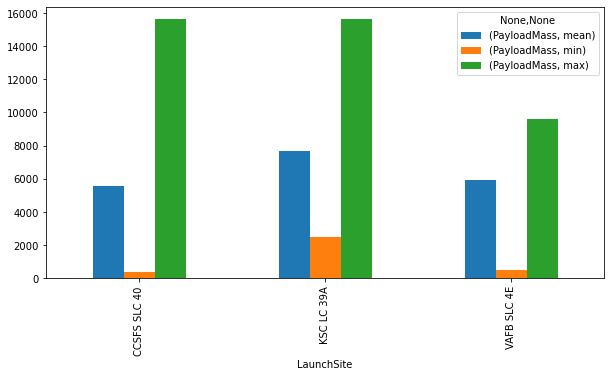

In [11]:
df3=pd.DataFrame(df_Site)
df3.plot.bar(figsize=(10,5))

In [12]:
#payload vs orbit vs success outcome
df_success = DN.loc[(DN.Outcome_TN == "True")]
df_robit= df_success.groupby('Orbit').agg({'PayloadMass': ['mean', 'min', 'max']})
pd.DataFrame(df_robit)

PayloadMass                            
               mean           min           max
Orbit                                          
ES-L1    570.000000    570.000000    570.000000
GEO     6123.547647   6123.547647   6123.547647
GTO     4855.785714   3000.000000   7076.000000
HEO      350.000000    350.000000    350.000000
ISS     3959.438462   1977.000000  12259.000000
LEO     4117.419059   1316.000000   6123.547647
MEO     3780.500000   3681.000000   3880.000000
PO      9600.000000   9600.000000   9600.000000
SSO     2060.000000    475.000000   4000.000000
VLEO   15400.000000  13200.000000  15600.000000

<AxesSubplot:xlabel='Orbit'>

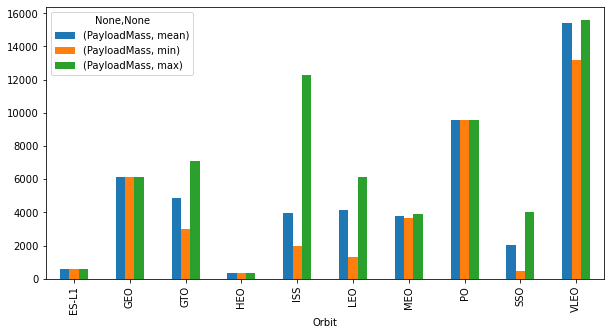

In [13]:
df4=pd.DataFrame(df_robit)
df4.plot.bar(figsize=(10,5))

In [14]:
#Success rate vs. Orbit type 
df_ro= DN.groupby('Orbit').apply(lambda x: x['Outcome_True'].sum()/len(x))
df_ro

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
dtype: float64

<AxesSubplot:title={'center':'success in orbits'}, xlabel='Orbit'>

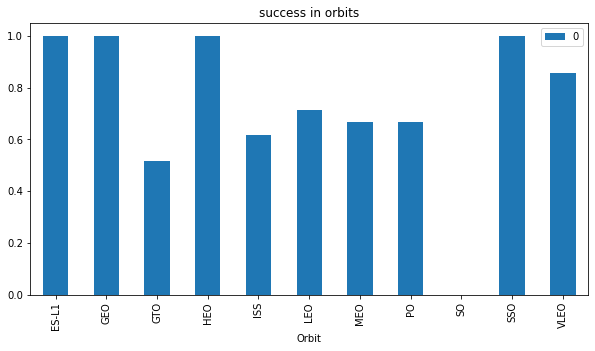

In [15]:
df5=pd.DataFrame(df_ro)
df5.plot.bar(figsize=(10,5),title='success in orbits')